In [1]:
import matplotlib.pyplot as plt 
SOURCE_FILE_PATH = '../data/2024 - Strat Casestudy.xlsx'

In [2]:
from loanlib.data_loader import DataLoader 
loader = DataLoader(SOURCE_FILE_PATH)

In [3]:
#question 1
df = loader.combined_data_frame
df

ID        Date  Month End Balances  Payment Due  \
ID   Date                                                            
1    2016-01-31     1  2016-01-31                 0.0     0.000000   
     2016-02-29     1  2016-02-29                 0.0     0.000000   
     2016-03-31     1  2016-03-31                 0.0     0.000000   
     2016-04-30     1  2016-04-30                 0.0     0.000000   
     2016-05-31     1  2016-05-31                 0.0     0.000000   
...               ...         ...                 ...          ...   
1630 2022-08-31  1630  2022-08-31             81951.0   325.201497   
     2022-09-30  1630  2022-09-30             81951.0   325.201497   
     2022-10-31  1630  2022-10-31             81951.0   325.201497   
     2022-11-30  1630  2022-11-30             81951.0   325.201497   
     2022-12-31  1630  2022-12-31             81951.0   325.201497   

                 Payment Made origination_date investor_1_acquisition_date  \
ID   Date                                                                    
1    2016-01-31      0.000000       2020-12-31                  2020-12-31   
     2016-02-29      0.000000       2020-12-31                  2020-12-31   
     2016-03-31      0.000000       2020-12-31                  2020-12-31   
     2016-04-30      0.000000       2020-12-31                  2020-12-31   
     2016-05-31      0.000000       2020-12-31                  2020-12-31   
...                       ...              ...                         ...   
1630 2022-08-31    325.201497       2022-05-31                  2022-05-31   
     2022-09-30    325.201497       2022-05-31                  2022-05-31   
     2022-10-31    325.201497       2022-05-31                  2022-05-31   
     2022-11-30    325.201497       2022-05-31                  2022-05-31   
     2022-12-31    325.201497       2022-05-31                  2022-05-31   

                reversion_date  original_balance  product  \
ID   Date                                                   
1    2016-01-31     2022-12-31            150876        1   
     2016-02-29     2022-12-31            150876        1   
     2016-03-31     2022-12-31            150876        1   
     2016-04-30     2022-12-31            150876        1   
     2016-05-31     2022-12-31            150876        1   
...                        ...               ...      ...   
1630 2022-08-31     2024-05-31             81951        2   
     2022-09-30     2024-05-31             81951        2   
     2022-10-31     2024-05-31             81951        2   
     2022-11-30     2024-05-31             81951        2   
     2022-12-31     2024-05-31             81951        2   

                 pre_reversion_fixed_rate  post_reversion_boe_margin  
ID   Date                                                             
1    2016-01-31                  0.019881                     0.0375  
     2016-02-29                  0.019881                     0.0375  
     2016-03-31                  0.019881                     0.0375  
     2016-04-30                  0.019881                     0.0375  
     2016-05-31                  0.019881                     0.0375  
...                                   ...                        ...  
1630 2022-08-31                  0.047619                     0.0200  
     2022-09-30                  0.047619                     0.0200  
     2022-10-31                  0.047619                     0.0200  
     2022-11-30                  0.047619                     0.0200  
     2022-12-31                  0.047619                     0.0200  

[136920 rows x 12 columns]

In [4]:
#Question 2
df = loader.create_features(df)
df

Month End Balances  Payment Due  Payment Made  \
ID   Date                                                        
1    2016-01-31                 0.0     0.000000      0.000000   
     2016-02-29                 0.0     0.000000      0.000000   
     2016-03-31                 0.0     0.000000      0.000000   
     2016-04-30                 0.0     0.000000      0.000000   
     2016-05-31                 0.0     0.000000      0.000000   
...                             ...          ...           ...   
1630 2022-08-31             81951.0   325.201497    325.201497   
     2022-09-30             81951.0   325.201497    325.201497   
     2022-10-31             81951.0   325.201497    325.201497   
     2022-11-30             81951.0   325.201497    325.201497   
     2022-12-31             81951.0   325.201497    325.201497   

                origination_date investor_1_acquisition_date reversion_date  \
ID   Date                                                                     
1    2016-01-31       2020-12-31                  2020-12-31     2022-12-31   
     2016-02-29       2020-12-31                  2020-12-31     2022-12-31   
     2016-03-31       2020-12-31                  2020-12-31     2022-12-31   
     2016-04-30       2020-12-31                  2020-12-31     2022-12-31   
     2016-05-31       2020-12-31                  2020-12-31     2022-12-31   
...                          ...                         ...            ...   
1630 2022-08-31       2022-05-31                  2022-05-31     2024-05-31   
     2022-09-30       2022-05-31                  2022-05-31     2024-05-31   
     2022-10-31       2022-05-31                  2022-05-31     2024-05-31   
     2022-11-30       2022-05-31                  2022-05-31     2024-05-31   
     2022-12-31       2022-05-31                  2022-05-31     2024-05-31   

                 original_balance  product  pre_reversion_fixed_rate  \
ID   Date                                                              
1    2016-01-31            150876        1                  0.019881   
     2016-02-29            150876        1                  0.019881   
     2016-03-31            150876        1                  0.019881   
     2016-04-30            150876        1                  0.019881   
     2016-05-31            150876        1                  0.019881   
...                           ...      ...                       ...   
1630 2022-08-31             81951        2                  0.047619   
     2022-09-30             81951        2                  0.047619   
     2022-10-31             81951        2                  0.047619   
     2022-11-30             81951        2                  0.047619   
     2022-12-31             81951        2                  0.047619   

                 post_reversion_boe_margin  ...  year_of_default  \
ID   Date                                   ...                    
1    2016-01-31                     0.0375  ...              NaN   
     2016-02-29                     0.0375  ...              NaN   
     2016-03-31                     0.0375  ...              NaN   
     2016-04-30                     0.0375  ...              NaN   
     2016-05-31                     0.0375  ...              NaN   
...                                    ...  ...              ...   
1630 2022-08-31                     0.0200  ...              NaN   
     2022-09-30                     0.0200  ...              NaN   
     2022-10-31                     0.0200  ...              NaN   
     2022-11-30                     0.0200  ...              NaN   
     2022-12-31                     0.0200  ...              NaN   

                 defaulted_amounts  recovery_in_month  postdefault_recoveries  \
ID   Date                                                                       
1    2016-01-31                0.0              False                     0.0   
     2016-02-29                0.0              False            

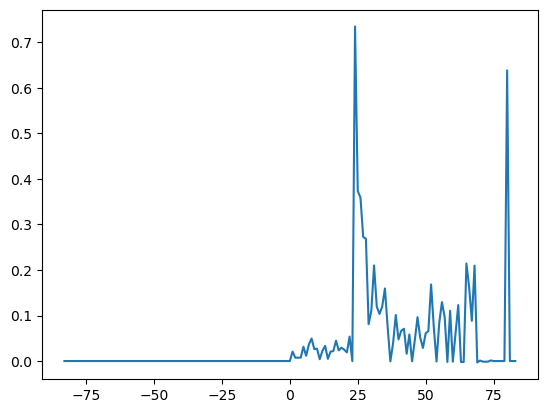

In [5]:
#Question 3
#a bit unsure if the calculation is correct, as the cashflows a bit confusing regarding the interest part, but the model should be easily fixable once clarified by changing smm feature in custom_feature.py, also things like somehow total paid amounts is greater than original balance, but unsure how interest payments is calculated
#Month End Balance doesn't seem to be informative as all the values are the same
from loanlib.core.loan_metrics import LoanMetrics
curves = LoanMetrics(df)
curves.plot('CPR')

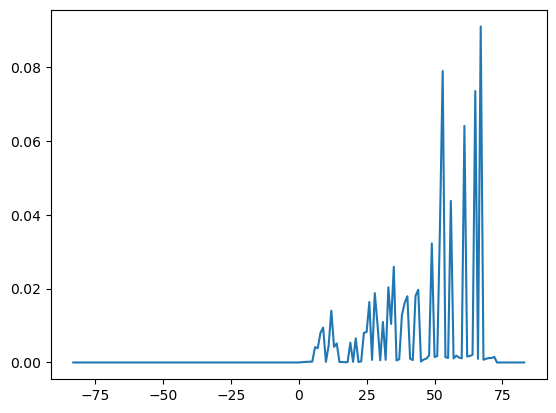

In [6]:
#Question 4
curves.plot('CDR')

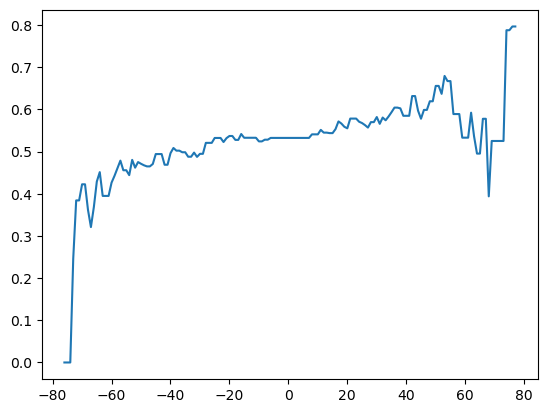

In [7]:
#Question 5
curves.plot('Recovery')

In [8]:
#Question 6
curves2 = LoanMetrics(df, index='time_to_reversion', pivots=['product'])
curves2.curve('CPR')

product,1,2
time_to_reversion,,
-59,0.0,0.000000
-58,0.0,0.000000
-57,0.0,0.000000
-56,0.0,0.834846
-55,0.0,0.000000
...,...,...
103,0.0,0.000000
104,0.0,0.000000
105,0.0,0.000000


In [9]:
#Question 7
curves3 = LoanMetrics(df, pivots=['year_of_default'])
curves3.curve('Recovery')

year_of_default,2021.0,2022.0
seasoning,,
-76,NaN,0.000000
-75,NaN,0.000000
-74,NaN,0.000000
-73,NaN,0.246291
-72,NaN,0.384304
...,...,...
73,0.796795,0.389514
74,0.796795,0.779028
75,0.796795,0.779028


In [10]:
#Question 8
#unsure what it means

In [11]:
#Question 9
#seems to match the excel model
from loanlib.core.model import run_single_simulation, run_simulations
run_single_simulation()

,principal_balloon,survival_percentage_post_default,expected_opening_default_balance,expected_new_defaults,expected_recoveries,closing_balance,scheduled_payment,end_of_period_survival,scheduled_interest,opening_balance,...,expected_balance_pre_period_prepays,scheduled_principal,expected_scheduled_payment,expected_principal_schedule,expected_interest,expected_opening_performing_balance,expected_loss,remaining_term,expected_balance_post_period_defaults,expected_closing_performing_balance
0,0.0,0.998318,0.000000e+00,1.682143e+02,0.000000e+00,100000.0,328.333333,0.996639,328.333333,100000.0,...,9.983179e+04,-5.684342e-14,327.781030,-5.674780e-14,327.781030,1.000000e+05,0.000000e+00,178.0,9.983179e+04,9.966385e+04
1,0.0,0.994962,1.682143e+02,1.676488e+02,0.000000e+00,100000.0,328.333333,0.993288,328.333333,100000.0,...,9.949621e+04,-5.684342e-14,326.679209,-5.655704e-14,326.679209,9.966385e+04,0.000000e+00,177.0,9.949621e+04,9.932884e+04
2,0.0,0.991618,3.358631e+02,1.670853e+02,0.000000e+00,100000.0,328.333333,0.989949,328.333333,100000.0,...,9.916175e+04,0.000000e+00,325.581091,0.000000e+00,325.581091,9.932884e+04,0.000000e+00,176.0,9.916175e+04,9.899495e+04
3,0.0,0.988284,5.029483e+02,1.665236e+02,0.000000e+00,100000.0,328.333333,0.986622,328.333333,100000.0,...,9.882843e+04,5.684342e-14,324.486665,5.617746e-14,324.486665,9.899495e+04,0.000000e+00,175.0,9.882843e+04,9.866218e+04
4,0.0,0.984962,6.694719e+02,1.659639e+02,0.000000e+00,100000.0,328.333333,0.983305,328.333333,100000.0,...,9.849622e+04,0.000000e+00,323.395917,0.000000e+00,323.395917,9.866218e+04,0.000000e+00,174.0,9.849622e+04,9.833053e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.000000,-1.192802e-12,1.153885e-14,9.419465e-15,0.0,0.000000,0.000000,0.000000,0.0,...,6.848073e-12,0.000000e+00,0.000000,0.000000e+00,0.000000,6.859612e-12,2.354866e-15,0.0,6.848073e-12,6.836554e-12
196,0.0,0.000000,-1.193038e-12,1.150006e-14,9.387802e-15,0.0,0.000000,0.000000,0.000000,0.0,...,6.825054e-12,0.000000e+00,0.000000,0.000000e+00,0.000000,6.836554e-12,2.346951e-15,0.0,6.825054e-12,6.813573e-12
197,0.0,0.000000,-1.193273e-12,1.146140e-14,9.356246e-15,0.0,0.000000,0.000000,0.000000,0.0,...,6.802111e-12,0.000000e+00,0.000000,0.000000e+00,0.000000,6.813573e-12,2.339061e-15,0.0,6.802111e-12,6.790669e-12
198,0.0,0.000000,-1.193507e-12,1.142287e-14,9.324795e-15,0.0,0.000000,0.000000,0.000000,0.0,...,6.779246e-12,0.000000e+00,0.000000,0.000000e+00,0.000000,6.790669e-12,2.331199e-15,0.0,6.779246e-12,6.767843e-12


In [12]:
#run 10000 base loan 
import time
num = 1e4
starting_time = time.time()
run_simulations([{}]*int(num))
print(time.time()-starting_time)

14.149563789367676


In [13]:
#Qurstion 10
#not sure where to input recovery curve, unclear what to input for 3/4/5 as well
base_curves = LoanMetrics(SOURCE_FILE_PATH, index ='time_to_reversion')
base_cpr = base_curves.curve('CPR')
base_cdr = base_curves.curve('CDR')
config1 = {'cpr': base_cpr, 'cdr':base_cdr}
base_cpr_2 = base_cpr.copy()
base_cpr_2['cpr'] = base_cpr.reset_index().apply(lambda x:x['cpr'] * (2.0 if x['time_to_reversion']>=0 else 1.0 ), axis=1).values
config2 = {'cpr': base_cpr_2, 'cdr':base_cdr}

In [14]:
run_simulations([config1, config2])

[     scheduled_interest  principal_balloon    defaults  interest_rate  \
 0            328.333333                0.0    2.139498         0.0394   
 1            328.333333                0.0  165.820621         0.0394   
 2            328.333333                0.0  150.573736         0.0394   
 3            328.333333                0.0    5.411073         0.0394   
 4            328.333333                0.0    8.422674         0.0394   
 ..                  ...                ...         ...            ...   
 195            0.000000                0.0         NaN         0.0944   
 196            0.000000                0.0         NaN         0.0944   
 197            0.000000                0.0         NaN         0.0944   
 198            0.000000                0.0         NaN         0.0944   
 199            0.000000                0.0         NaN         0.0944   
 
      expected_closing_performing_balance  end_of_period_survival  \
 0                          100002.120200

In [15]:
#Question 11
#has included a skeleton tests structure with some examples, but it is far from complete
#ideally I should create a fake datasets with data specified manually, so I can control the expected output and 
# cashflows schedules etc. (e.g. A defaults on day y and B doesn't) However, currently I just take a random subset of the real data and only perform sanity checks (values have be greater than 0.0, percentages are between 0 and 1 etc.)